<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140502 entries, 0 to 140501
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MOVIE_ID       140502 non-null  int64  
 1   NAME           140502 non-null  object 
 2   ALIAS          30322 non-null   object 
 3   ACTORS         82851 non-null   object 
 4   COVER          50654 non-null   object 
 5   DIRECTORS      70244 non-null   object 
 6   DOUBAN_SCORE   140502 non-null  float64
 7   DOUBAN_VOTES   140502 non-null  float64
 8   GENRES         136452 non-null  object 
 9   IMDB_ID        113256 non-null  object 
 10  LANGUAGES      131444 non-null  object 
 11  MINS           140502 non-null  float64
 12  OFFICIAL_SITE  9821 non-null    object 
 13  REGIONS        136501 non-null  object 
 14  RELEASE_DATE   77687 non-null   object 
 15  SLUG           140502 non-null  object 
 16  STORYLINE      87052 non-null   object 
 17  TAGS           97398 non-null

/Users/hangxin/opt/anaconda3/envs/experiment/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43325 entries, 0 to 48340
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          43325 non-null  object 
 1   titleType       43325 non-null  object 
 2   primaryTitle    43325 non-null  object 
 3   originalTitle   43325 non-null  object 
 4   isAdult         43325 non-null  object 
 5   startYear       43325 non-null  object 
 6   endYear         43325 non-null  object 
 7   runtimeMinutes  43325 non-null  object 
 8   genres          43325 non-null  object 
 9   averageRating   43325 non-null  float64
 10  numVotes        43325 non-null  int64  
 11  MOVIE_ID        43325 non-null  int64  
 12  NAME            43325 non-null  object 
 13  ALIAS           25847 non-null  object 
 14  ACTORS          37278 non-null  object 
 15  COVER           25419 non-null  object 
 16  DIRECTORS       34123 non-null  object 
 17  DOUBAN_SCORE    43325 non-null 

array([[1.        , 0.77964534],
       [0.77964534, 1.        ]])

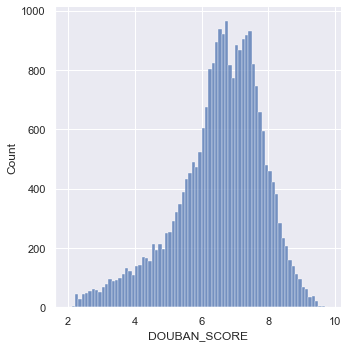

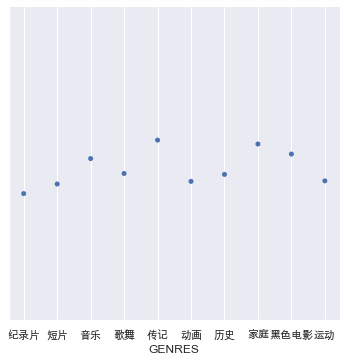

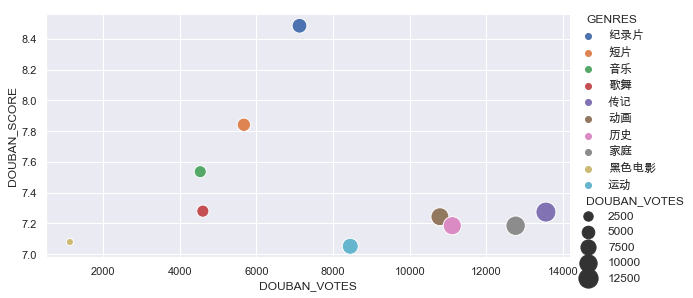

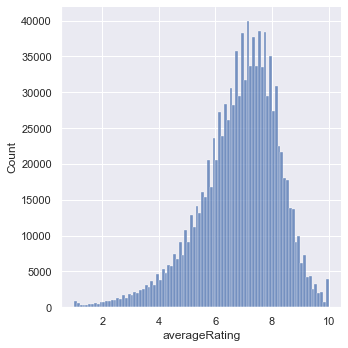

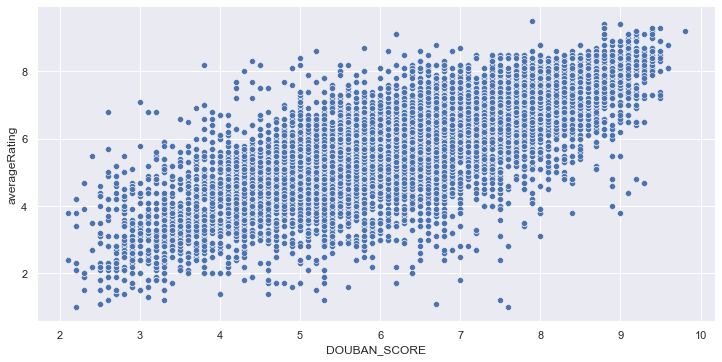

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
sns.set(font='Arial Unicode MS')  #to show Chinese character 


# In[2]:


douban = pd.read_csv('/Users/hangxin/Documents/Projects/Movie_ratings/movies.csv')
douban.head(20)


# In[3]:


douban.info()


# In[4]:


douban['YEAR'].describe()


# In[5]:


douban['DOUBAN_SCORE'].value_counts()


# In[6]:


#The zeros are most likely the movies that are scheduled to release - 
#as the years can go as far as 2049, or 
#those that haven't received enough votes. Movies have non-zero scores are subset out. 
douban = douban[douban['DOUBAN_SCORE']>0]
sns.displot(douban, x='DOUBAN_SCORE', binwidth = 0.1)
#Now we can see the distribution is nearly normal but left skewed. 


# In[7]:


#split the genres to a list  
#there are NaN in GENRES column so there is a checkpoint before split to avoid triggering error
douban['GENRES']= douban['GENRES'].apply(lambda genre: 
                                         [] if type(genre) == float else genre.split('/'))


# In[8]:


#explode the list of genres in each row to multiple rows 
#and then aggregrate the genre and find out the top 10 rated genres
douban_ratings = douban.explode('GENRES').groupby('GENRES').mean()


# In[9]:


top_ratings = douban_ratings[douban_ratings['DOUBAN_VOTES'] >1000].nlargest(10,'DOUBAN_SCORE')


# In[10]:


top_ratings


# In[11]:


sns.catplot(data = top_ratings, x =top_ratings.index)


# In[60]:


sns.relplot(data=top_ratings, 
            x='DOUBAN_VOTES', y='DOUBAN_SCORE',
            size='DOUBAN_VOTES',sizes = (50, 400), 
            hue='GENRES',
            height = 4,
            aspect = 2)


# In[14]:


douban1 = douban
douban1['REGIONS'] = douban1['REGIONS'].apply(lambda r: r.split('/'))


# In[15]:


regions = douban1.explode('REGIONS').groupby('REGIONS').mean().nlargest(20,'DOUBAN_SCORE')


# In[16]:


regions


# In[17]:


imdb = pd.read_csv('/Users/hangxin/Documents/Projects/Movie_ratings/title.basics.tsv.gz',
                   sep='\t', compression='gzip')


# In[18]:


imdb.head()


# In[19]:


imdb.set_index('tconst')


# In[20]:


im_rating = pd.read_csv('/Users/hangxin/Documents/Projects/Movie_ratings/title.ratings.tsv.gz',
                   sep='\t', compression='gzip')
im_rating.set_index('tconst')


# In[21]:


new_imdb = imdb.merge(im_rating, how='inner',on='tconst')
new_imdb.head(20)


# In[22]:


new_imdb.set_index('tconst')


# In[23]:


sns.displot(new_imdb,x='averageRating', binwidth=0.1)


# In[24]:


new_imdb['genres'].value_counts().unique


# In[107]:


new_imdb['genres'] = new_imdb['genres'].apply(lambda g: 
                                              [] if type(g) == float else g.split(','))


# In[26]:


im = new_imdb.explode('genres')


# In[111]:


new_imdb.head()


# In[109]:


im_ratings = im[im['numVotes']>500].nlargest(10,'averageRating')


# In[110]:


im_ratings.head()


# In[151]:


df = pd.concat([im, douban],keys=['imdb','douban'],axis =1)


# In[153]:


df[df.douban.MOVIE_ID.isna()== False]


# In[162]:


df.to_csv("sample_result.tsv", sep='\t')


# In[112]:


merged_df = im.merge(douban,how='inner',left_on='tconst',right_on = 'IMDB_ID')


# In[124]:


merged_df.sort_values(by='primaryTitle').head(30)


# In[142]:


new_df = merged_df.loc[(merged_df['titleType']== 'movie') | (merged_df['titleType']== 'short')]


# In[143]:


new_df.info()


# In[103]:


merged_df = merged_df.explode('genres')


# In[104]:


merged_df.head(20)


# In[31]:


sns.relplot(data = merged_df, x='DOUBAN_SCORE', y='averageRating',
            height = 5,
            aspect = 2)


# In[32]:


np.corrcoef(x=merged_df['DOUBAN_SCORE'], y=merged_df['averageRating'])
#correlation coefficient is 0.77


# In[ ]:




